# 20newsgroups
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.



<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/20newsgroup.png" width="1200">

In [1]:
from sklearn.datasets import fetch_20newsgroups

## BOW + TF-IDF

(11314, 13188)

In [6]:
newsgroups_train

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

newsgroups_train = fetch_20newsgroups(subset='train',shuffle=True)
newsgroups_test = fetch_20newsgroups(subset='test',shuffle=True)

vectorizer = CountVectorizer(stop_words='english',min_df=0.001, max_df=0.20)
tfidfconverter = TfidfTransformer()

X_train_vect = vectorizer.fit_transform(newsgroups_train.data).toarray() # La BOW= vettorizzazione con il counting delle freq
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
y_train = newsgroups_train.target
print(X_train.shape, y_train.shape)

X_test_vect = vectorizer.transform(newsgroups_test.data).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
y_test = newsgroups_test.target
print(X_test.shape, y_test.shape)

(11314, 13188) (11314,)
(7532, 13188) (7532,)


In [8]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       319
           1       0.67      0.71      0.69       389
           2       0.68      0.66      0.67       394
           3       0.66      0.71      0.68       392
           4       0.83      0.78      0.80       385
           5       0.83      0.78      0.81       395
           6       0.76      0.83      0.79       390
           7       0.86      0.86      0.86       396
           8       0.90      0.94      0.92       398
           9       0.94      0.91      0.93       397
          10       0.94      0.98      0.96       399
          11       0.90      0.90      0.90       396
          12       0.76      0.72      0.74       393
          13       0.87      0.79      0.83       396
          14       0.87      0.90      0.88       394
          15       0.81      0.93      0.87       398
          16       0.75      0.89      0.81       364
          17       0.96    

Text(145.72222222222223, 0.5, 'Actual')

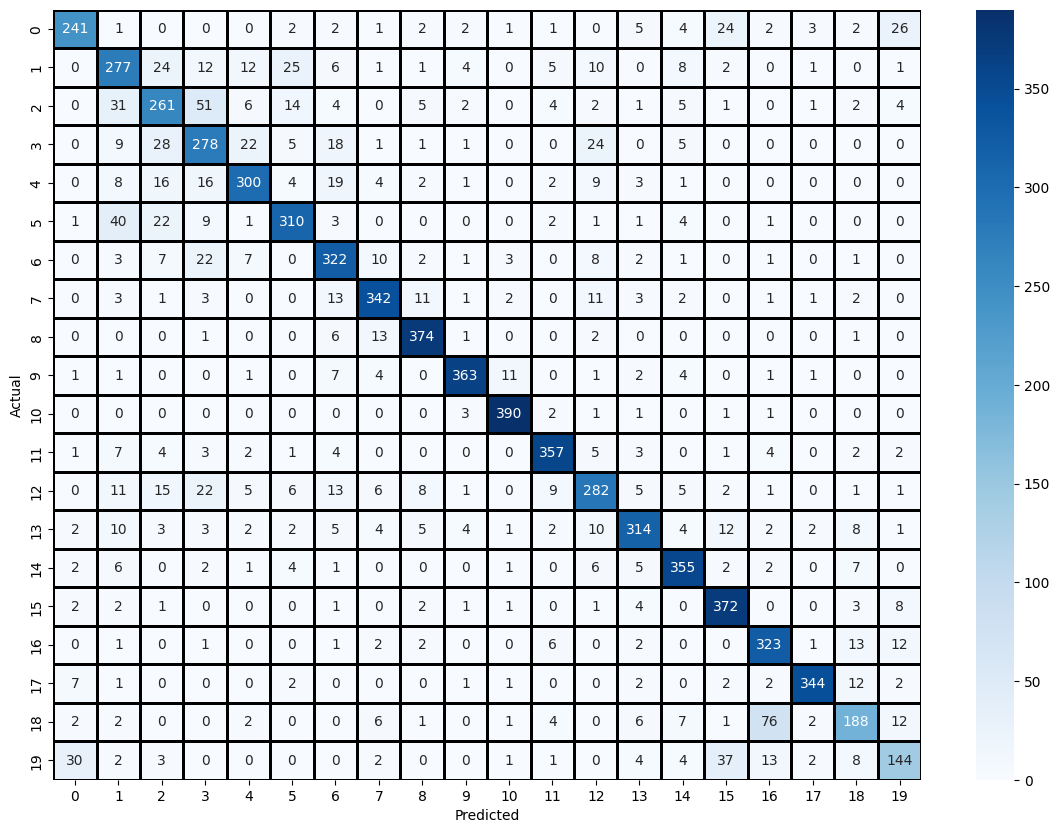

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [10]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50,max_depth=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.75      0.37      0.50       319
           1       0.76      0.40      0.53       389
           2       0.58      0.68      0.63       394
           3       0.44      0.43      0.43       392
           4       0.11      0.01      0.01       385
           5       0.60      0.52      0.56       395
           6       0.83      0.37      0.51       390
           7       0.69      0.57      0.62       396
           8       0.87      0.74      0.80       398
           9       0.84      0.60      0.70       397
          10       0.68      0.89      0.77       399
          11       0.64      0.91      0.75       396
          12       0.14      0.61      0.23       393
          13       0.75      0.21      0.33       396
          14       0.65      0.72      0.69       394
          15       0.48      0.87      0.62       398
          16       0.62      0.77      0.68       364
          17       0.87    

Text(145.72222222222223, 0.5, 'Actual')

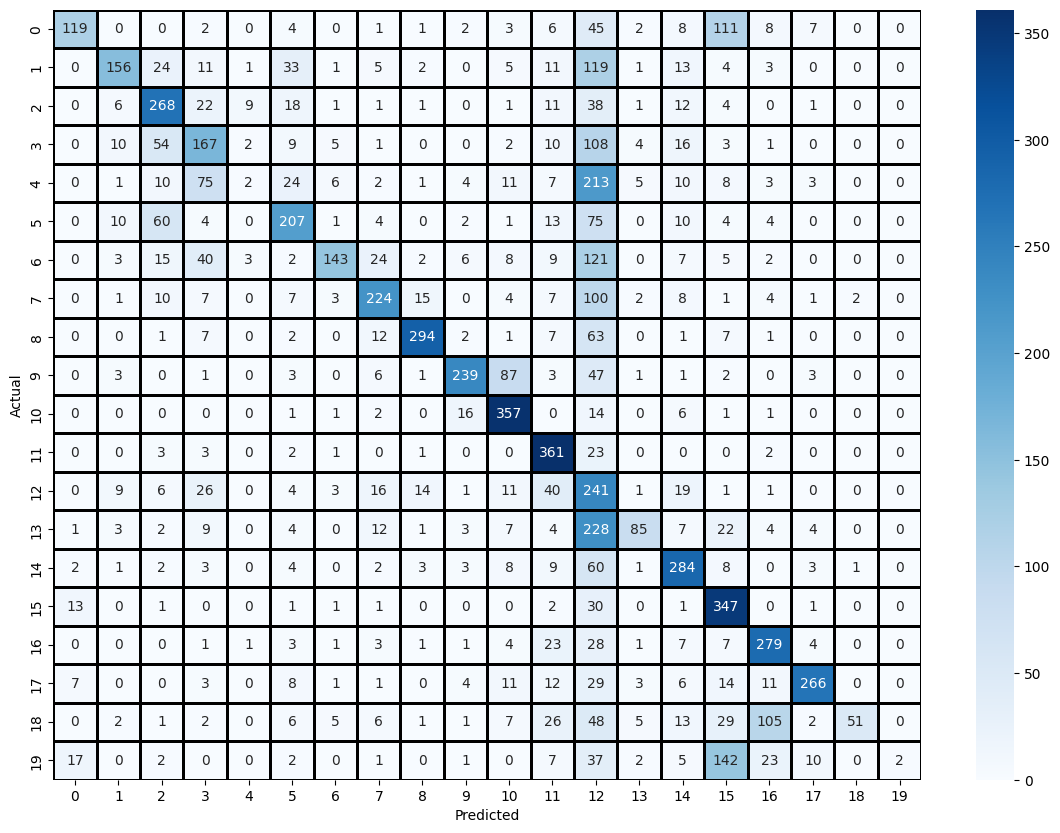

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")

## Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

bow = CountVectorizer(stop_words='english')
tfidf = TfidfTransformer()
classifier = MultinomialNB(alpha=.01)

pipe = Pipeline([('bow', bow),
                 ('tfidf', tfidf),
                 ('clf', classifier),
                ])

pipe.fit(newsgroups_train.data,newsgroups_train.target)
y_pred = pipe.predict(newsgroups_test.data)
f1_score(y_test, y_pred, average='macro')

0.8278889894475222

Text(145.72222222222223, 0.5, 'Actual')

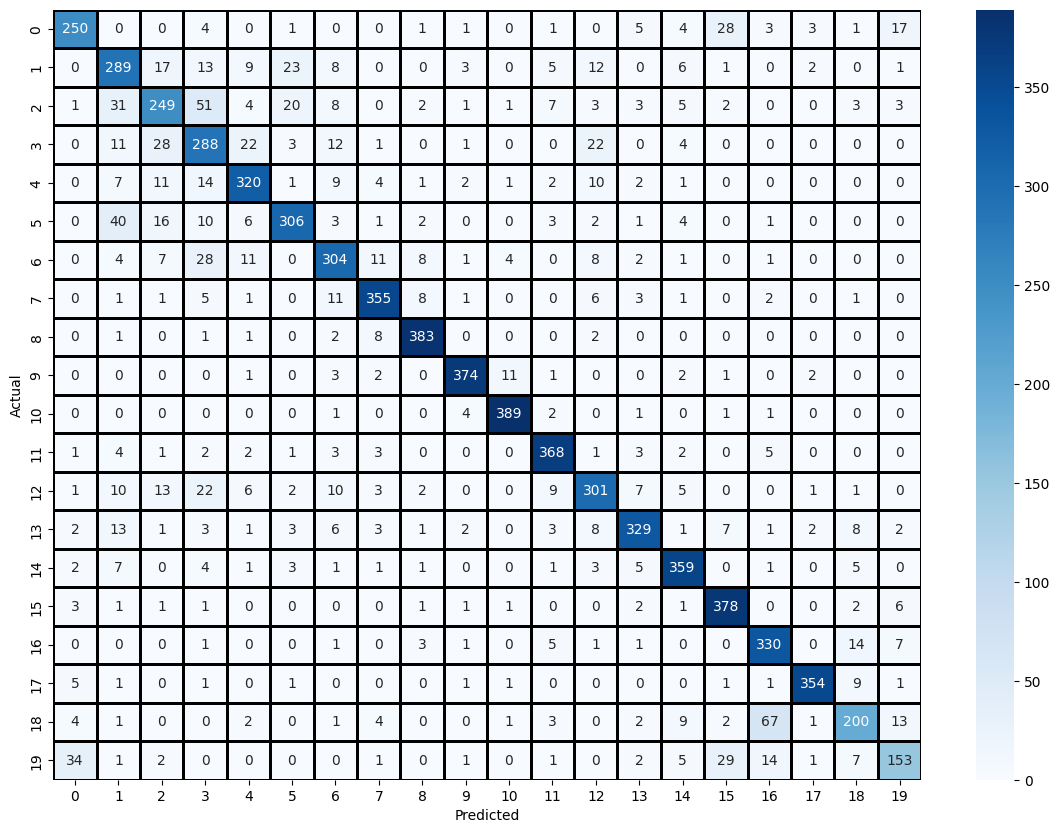

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")